In [16]:
%load_ext autoreload
%autoreload 2
from train import train_till_convergence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
# Default hyperparameters
d = 200
n = 100
m = 64
corruption_rate = 0.1
signal_level = 0.1

100%|██████████| 4/4 [04:23<00:00, 65.91s/it]


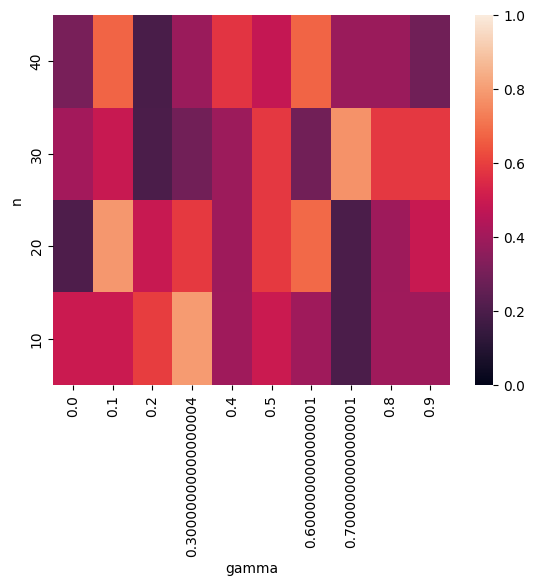

In [61]:
# Generate heatmaps
n_values = []
gamma_values = []
generalization_error_values = []
for n in tqdm(np.arange(10, 50, 10)):
    for gamma in np.arange(0, 1, 0.1):
        d = 2 * n
        total_generalization_error = 0
        for i in range(10):
            _, generalization_error_sample = train_till_convergence(d, n, m, corruption_rate, gamma, verbosity=-1)
            total_generalization_error += generalization_error_sample
        generalization_error = total_generalization_error / 10
        n_values.append(n)
        gamma_values.append(gamma)
        generalization_error_values.append(generalization_error)
df = pd.DataFrame({"n": n_values, "gamma": gamma_values, "generalization_error": generalization_error_values})
table = df.pivot(index="n", columns="gamma", values="generalization_error")
ax = sns.heatmap(table, vmin=0, vmax=1)
ax.invert_yaxis()

plt.show()